In [1883]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import h5py

SAVE_PLOTS = False

# Setup Parameters

Hamamatsu S13360-6025 SiPM

Voltage: $55.5 V$, Current: $
\approx 0.06 \mu A$

Trigger height: $2.32mV$, div $20mV$/$10 \mu s$


In [ ]:
def get_default_filename():
    # get the newest file of the kind: analysis\data\sipm_spectroscopy\vp2ps_20250316-171204.csv
    import os
    import glob
    import re
    path = r'data\pmt_spectroscopy'
    files = glob.glob(path + '\*.csv')
    files.sort(key=os.path.getmtime)
    return files[-1]


vp2p_path = get_default_filename()
# vp2p_path = r'data\pmt_spectroscopy\vp2ps_20250320-171041.csv'
df = pd.read_csv(vp2p_path)
df.head(1)

,Unnamed: 0,t,V
0,0,1.742491e+09,0.424


In [1885]:

df['mV'] = df['V']*1000
df['mV'] = df['mV'].round()
mV_low_cut = 80 # trigger level
mV_high_cut = 1000
df = df.loc[(df['mV'] > mV_low_cut) & (df['mV'] < mV_high_cut)].dropna()

df['t'] = [datetime.fromtimestamp(t) for t in df['t']]
df['t'] = pd.to_datetime(df['t'])
df = df.sort_values(by='t')
df.head(5)
df.describe()

,Unnamed: 0,t,V,mV
count,81.000000,81,81.000000,81.000000
mean,40.530864,2025-03-20 18:13:41.810539776,0.396148,396.148148
min,0.000000,2025-03-20 18:13:14.284415,0.208000,208.000000
25%,20.000000,2025-03-20 18:13:28.589176064,0.288000,288.000000
50%,41.000000,2025-03-20 18:13:41.700243968,0.352000,352.000000
75%,61.000000,2025-03-20 18:13:55.375688960,0.520000,520.000000
max,81.000000,2025-03-20 18:14:09.117932,0.776000,776.000000
std,23.961994,NaN,0.142622,142.621800


In [1886]:
def print_stats():
    time_diff = (df['t'].iloc[-1] - df['t'].iloc[0]).seconds / 60
    avg_data_points_per_minute = df.shape[0] / time_diff

    print(f'Number of data points: {df.shape[0]}')
    print(f'Start time: {df["t"].iloc[0]}')
    print(f'End time: {df["t"].iloc[-1]}')
    print(f'Average number of data points per minute: {avg_data_points_per_minute:.2f}')
    print(f'Average number of data points per hour: {avg_data_points_per_minute * 60:.2f}')
    print(f'Total time of measurement: {time_diff // 60:.0f} hours and {time_diff % 60:.0f} minutes')
print_stats()

Number of data points: 81
Start time: 2025-03-20 18:13:14.284415
End time: 2025-03-20 18:14:09.117932
Average number of data points per minute: 90.00
Average number of data points per hour: 5400.00
Total time of measurement: 0 hours and 1 minutes


Number of bins: 232
[  78.   82.   86.   90.   94.   98.  102.  106.  110.  114.  118.  122.
  126.  130.  134.  138.  142.  146.  150.  154.  158.  162.  166.  170.
  174.  178.  182.  186.  190.  194.  198.  202.  206.  210.  214.  218.
  222.  226.  230.  234.  238.  242.  246.  250.  254.  258.  262.  266.
  270.  274.  278.  282.  286.  290.  294.  298.  302.  306.  310.  314.
  318.  322.  326.  330.  334.  338.  342.  346.  350.  354.  358.  362.
  366.  370.  374.  378.  382.  386.  390.  394.  398.  402.  406.  410.
  414.  418.  422.  426.  430.  434.  438.  442.  446.  450.  454.  458.
  462.  466.  470.  474.  478.  482.  486.  490.  494.  498.  502.  506.
  510.  514.  518.  522.  526.  530.  534.  538.  542.  546.  550.  554.
  558.  562.  566.  570.  574.  578.  582.  586.  590.  594.  598.  602.
  606.  610.  614.  618.  622.  626.  630.  634.  638.  642.  646.  650.
  654.  658.  662.  666.  670.  674.  678.  682.  686.  690.  694.  698.
  702.  706.  710.  714.  718. 

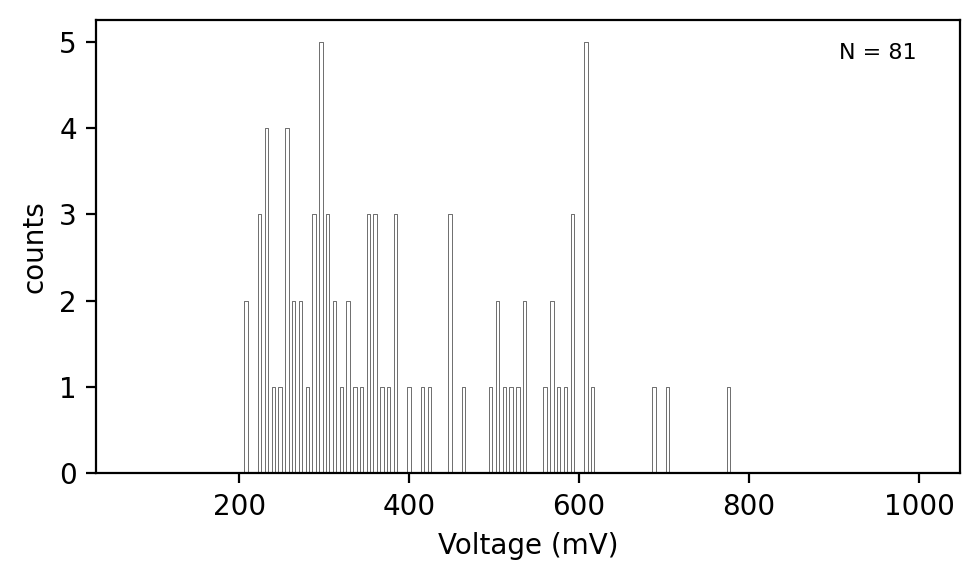

In [1887]:

fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=200)

step = 4
hist_min = mV_low_cut
hist_max = mV_high_cut
bins = np.arange(hist_min - step/2, hist_max + step, step)

print(f'Number of bins: {len(bins)}')
count, bins, _ = ax.hist(df['mV'], bins=bins, color='black', histtype='step', linewidth=0.2, range=(hist_min, hist_max))
print(bins)

# rescale the x axis by 1000 to convert from V to mV
# ax.set_xticks(ax.get_xticks()*1000)
ax.set_xlabel('Voltage (mV)')
ax.set_ylabel('counts')
plt.tight_layout()


# display the number of entries in the upper right corner of the plot
n_entries = df.shape[0]
ax.text(0.95, 0.95, f'N = {n_entries}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=8)

ax.set_xlabel('Voltage (mV)')
ax.set_ylabel('counts')
plt.tight_layout()
# ax.set_yscale('log')
if SAVE_PLOTS:
    save_dir = f'plots/sipm_spectroscopy/preliminary/threshhold_4pt4mV'
    ax.set_yscale('log')
    plt.savefig(f'{save_dir}/spectrum_Co60_10mins_log.png', dpi=200)
    ax.set_yscale('linear')
    plt.savefig(f'{save_dir}/spectrum_Co60_10mins.png', dpi=200)

plt.show()